# LSTM_R-NEURAL NETWORK PROJECT
  # FOR STOCK PRICE PREDICTION

  ## MADE BY- SIDDHARTHA SAMANT
  Birla Institute of Technology ,Mesra


THIS PROJECT IS BASED ON USING AN LSTM RECURRENT NEURAL NETWORK ,TO PREDICT THE 'Open' VALUE OF STOCK PRICE,USING THE DATA SET ,"GOOGLE_STOCK_PRICE" AVAILABLE ON KAGGLE.

THE DATA SET CONSISTS OF 6 COLOUMNS
Date	Open	High	Low  Close Volume




In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
train = df.iloc[:, 1:2].values

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
df['Open'].describe

<bound method NDFrame.describe of 0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64>

## *FEATURE SCALING*

## Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Example: If an algorithm is not using feature scaling method then it can consider the value 3000 meter to be greater than 5 km but that’s actually not true and in this case, the algorithm will give wrong predictions. So, we use Feature Scaling to bring all values to same magnitudes and thus, tackle this issue.

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train2 = sc.fit_transform(train)


**NOW WE CREATE OUR DATA SET OF BATCH SIZE 60, IT MEANS THAT Open PRICE VALUES FOR 60 CONSECUTIVE DAYS STARTING FROM ANY DAY WILL BE AN ELEMENT OF THE LIST THAT IS OUR TRAINING DATA AND THE Open PRICE VALUE ON THE 61ST DAY WILL BE AN ELEMENT ADDED TO THE TARGET VARIABLE(LIST)**

SO Open PRICE FROM 2ND TO 62ND DAY WILL BW TRAINING DATA AND FOR THIS TRAINING DATA THE Open PRICE ON 63RD DAY WILL BECOME THE TARGET VALUE


In [0]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train2[i-60:i, 0])
    y_train.append(train2[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


# Introduction to Recurrent Neural Network
## Recurrent Neural Network(RNN) are a type of Neural Network where the output from previous step are fed as input to the current step. In traditional neural networks, all the inputs and outputs are independent of each other, but in cases like when it is required to predict the next word of a sentence, the previous words are required and hence there is a need to remember the previous words. Thus RNN came into existence, which solved this issue with the help of a Hidden Layer. The main and most important feature of RNN is Hidden state, which remembers some information about a sequence.

### RNN have a “memory” which remembers all information about what has been calculated. It uses the same parameters for each input as it performs the same task on all the inputs or hidden layers to produce the output. This reduces the complexity of parameters, unlike other neural networks.

In [0]:
reg = Sequential()


In [0]:
# Adding the first LSTM layer and some Dropout regularisation
reg.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
reg.add(Dropout(0.20))

# Adding a second LSTM layer and some Dropout regularisation
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.10))

# Adding a third LSTM layer and some Dropout regularisation
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.20))

# Adding a fourth LSTM layer and some Dropout regularisation
reg.add(LSTM(units = 60))
reg.add(Dropout(0.20))

# Adding the output layer
reg.add(Dense(units = 1))

# Compiling the RNN
reg.compile(optimizer = 'adam', loss = 'mean_squared_error')


# WHY LSTM

 Disadvantages of Recurrent Neural Network

Gradient vanishing and exploding problems.
Training an RNN is a very difficult task.
It cannot process very long sequences if using tanh or relu as an activation function.

# Long Short Term Memory Networks 


To solve the problem of Vanishing and Exploding Gradients in a deep Recurrent Neural Network, many variations were developed. One of the most famous of them is the Long Short Term Memory Network(LSTM). In concept, an LSTM recurrent unit tries to “remember” all the past knowledge that the network is seen so far and to “forget” irrelevant data. This is done by introducing different activation function layers called “gates” for different purposes. Each LSTM recurrent unit also maintains a vector called the Internal Cell State which conceptually describes the information that was chosen to be retained by the previous LSTM recurrent unit. A Long Short Term Memory Network consists of four different gates:-

Forget Gate(f): It determines to what extent to forget the previous data.
Input Gate(i): It determines the extent of information to be written onto the Internal Cell State.
Input Modulation Gate(g): It is often considered as a sub-part of the input gate and many literatures on LSTM’s do not even mention it and assume it inside the Input gate. It is used to modulate the information that the Input gate will write onto the Internal State Cell by adding non-linearity to the information and making the information Zero-mean. This is done to reduce the learning time as Zero-mean input has faster convergence. Although this gate’s actions are less important than the others and is often treated as a finesse-providing concept, it is good practice to include this gate into the structure of the LSTM unit.
Output Gate(o): It determines what output(next Hidden State) to generate from the current Internal Cell State.

![alt text](https://drive.google.com/uc?id=1igtp3eFPKT7VycQec4X8HoLYSAPJ_heU)

In [12]:
reg.fit(X_train, y_train, epochs = 20, batch_size = 32)


Epoch 1/20
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0439
Epoch 2/20
1198/1198 [==============================] - 23s 20ms/step - loss: 0.0051
Epoch 3/20
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0053
Epoch 4/20
1198/1198 [==============================] - 23s 20ms/step - loss: 0.0050
Epoch 5/20
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0044
Epoch 6/20
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0044
Epoch 7/20
1198/1198 [==============================] - 23s 20ms/step - loss: 0.0046
Epoch 8/20
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0045
Epoch 9/20
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0038
Epoch 10/20
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0042
Epoch 11/20
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0037
Epoch 12/20
1198/1198 [==============================] - 23s 19

In [18]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Date"]).dt.month
dataset["Year"] = pd.to_datetime(df["Date"]).dt.year
dataset["Date1"] = pd.to_datetime(df["Date"]).dt.date
dataset["Time"] = pd.to_datetime(df["Date"]).dt.time
dataset["Week"] = pd.to_datetime(df["Date"]).dt.week
dataset["Day"] = pd.to_datetime(df["Date"]).dt.day_name()
dataset = df.set_index("Date")
dataset.index = pd.to_datetime(dataset.index)
dataset.head()

,Open,High,Low,Close,Volume,Month,Year,Time,Week,Day,Date1
Date,,,,,,,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",1,2012,00:00:00,1,Tuesday,2012-01-03
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",1,2012,00:00:00,1,Wednesday,2012-01-04
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",1,2012,00:00:00,1,Thursday,2012-01-05
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",1,2012,00:00:00,1,Friday,2012-01-06
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",1,2012,00:00:00,2,Monday,2012-01-09


In [16]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2012 2013 2014 2015 2016] 

Total Number of Unique Year 5 



No handles with labels found to put in legend.


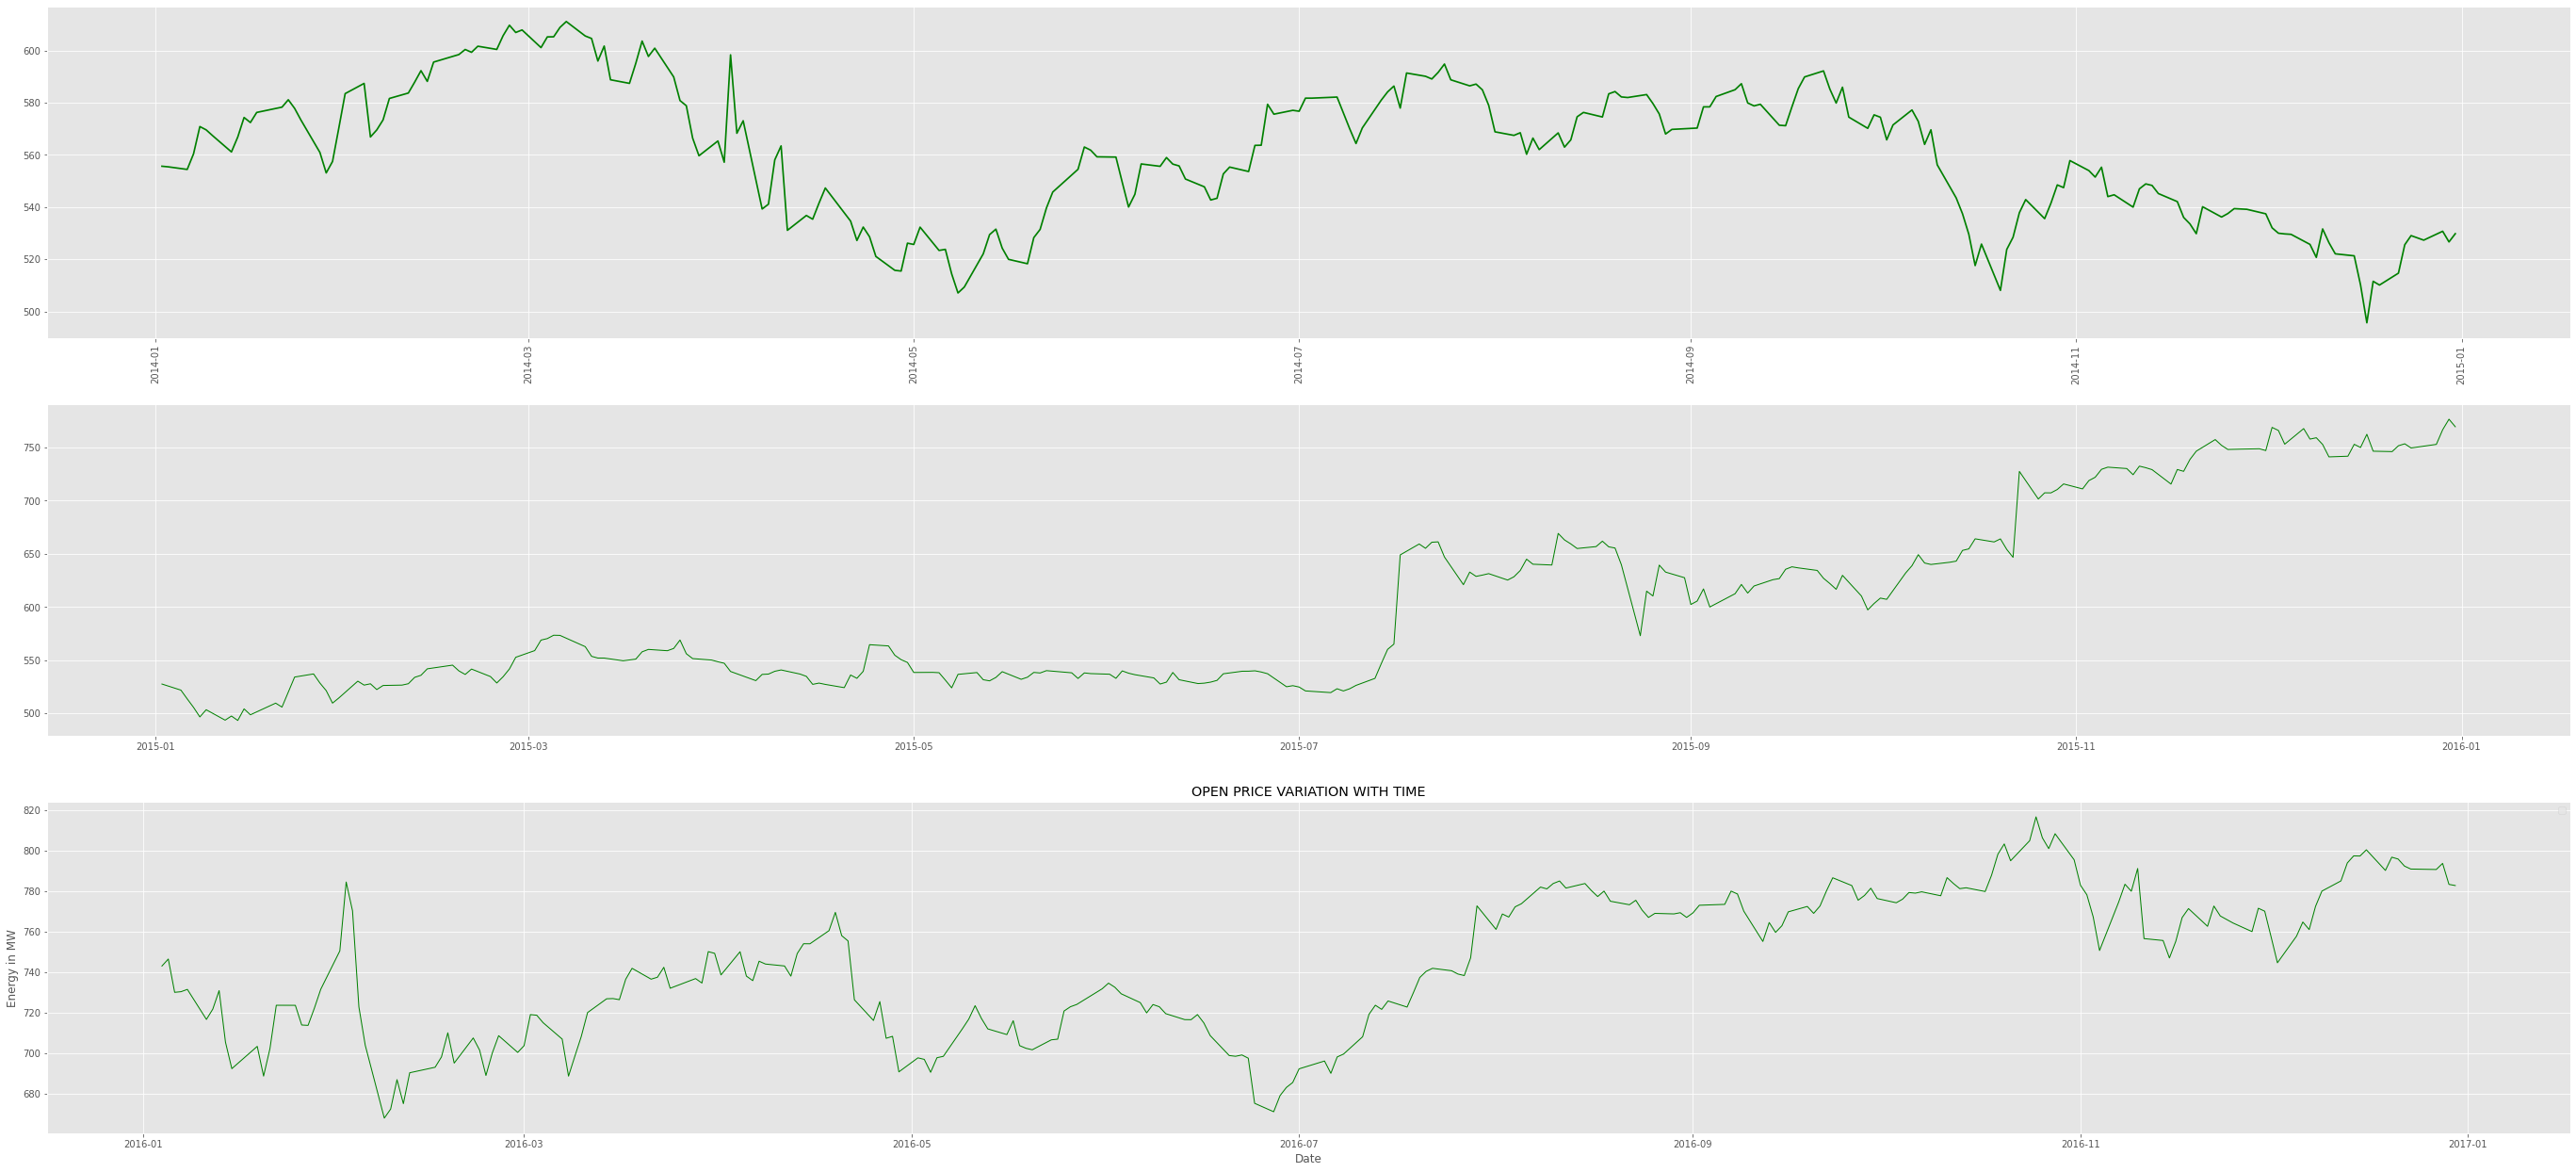

In [20]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2014 = dataset["2014"]["Open"].to_list()
x_2014 = dataset["2014"]["Date1"].to_list()
ax1.plot(x_2014,y_2014, color="green", linewidth=1.7)


y_2015 = dataset["2015"]["Open"].to_list()
x_2015 = dataset["2015"]["Date1"].to_list()
ax2.plot(x_2015, y_2015, color="green", linewidth=1)


y_2016 = dataset["2016"]["Open"].to_list()
x_2016 = dataset["2016"]["Date1"].to_list()
ax3.plot(x_2016, y_2016, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (88,32)
plt.title("OPEN PRICE VARIATION WITH TIME")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# *NOW WE USE THE "GOOGLE_STOCK_PRICE_TEST.CSV TO EVALUATE OUR LSTM MODEL, HERE ALSO WE FIRST PROCESS THE Open PRICE VALUES .THEN WE SCALE DOWN THE VALUES AND PASS IT TO OUR LSTM MODEL WITH PROPER RESHAPING OF INPUT DATA ,THEN WE MAKE PREDICTIONS *

In [0]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
df2= pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = df2.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
total_data= pd.concat((df['Open'], df2['Open']), axis = 0)
inputs = total_data[len(total_data) - len(df2) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = reg.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


# AFTER PREDICTION WE COMPARE IT WITH THE REAL Open STOCK PRICE VALUES
 ## FOR A BETTER VISUALISATION WE PLOT THE VALUES TO COMPARE HOW WELL THE MODEL HAS BEEN SUCCESSFUL IN CAPTURING THE BEHAVIOUR

 the red line represents the real stock prices
 the blue one represents the predicted ones

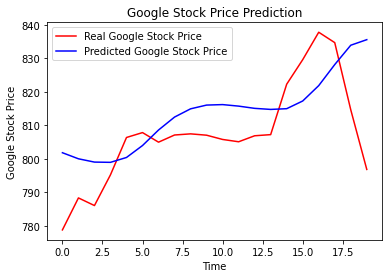

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
